In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('googleps_cleaned.csv')
print(df.columns)
df.describe()

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')


,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres
count,7723.000000,7.723000e+03,7723.00000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000
mean,16.551599,2.948983e+05,37.30707,8.481937,0.074712,1.128169,1.473909,60.559368
std,8.128757,1.863933e+06,93.54223,4.888265,0.262943,17.408036,1.010531,32.423595
min,0.000000,1.000000e+00,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,1.075000e+02,6.10000,3.000000,0.000000,0.000000,1.000000,35.000000
50%,14.000000,2.332000e+03,16.00000,7.000000,0.000000,0.000000,1.000000,64.000000
75%,24.000000,3.905300e+04,37.00000,12.000000,0.000000,0.000000,1.000000,92.000000
max,32.000000,4.489389e+07,994.00000,19.000000,1.000000,400.000000,5.000000,114.000000


In [4]:
from sklearn.preprocessing import StandardScaler
features = ['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres']

x = df.loc[:, features].values
y = df.loc[:,['Rating']].values
x = StandardScaler().fit_transform(x)

pd.DataFrame(data=x, columns = features).head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,-2.03631,-0.158138,-0.195722,-0.507767,-0.284156,-0.064812,-0.469001,-1.590283
1,-2.03631,-0.157704,-0.249177,1.947251,-0.284156,-0.064812,-0.469001,-1.528596
2,-2.03631,-0.111271,-0.305840,0.924327,-0.284156,-0.064812,-0.469001,-1.590283
3,-2.03631,-0.042523,-0.131576,1.538081,-0.284156,-0.064812,2.499928,-1.590283
4,-2.03631,-0.157704,-0.368917,0.105988,-0.284156,-0.064812,-0.469001,-1.559440


In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,2.353331,0.207266
1,2.407013,-0.380462
2,2.413793,-0.153509
3,3.147932,-0.685388
4,2.358930,0.036626


In [6]:
finalDf = pd.concat([principalDf, df[['Rating']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,Rating
0,2.353331,0.207266,High Rating
1,2.407013,-0.380462,Average Rating
2,2.413793,-0.153509,High Rating
3,3.147932,-0.685388,High Rating
4,2.358930,0.036626,High Rating


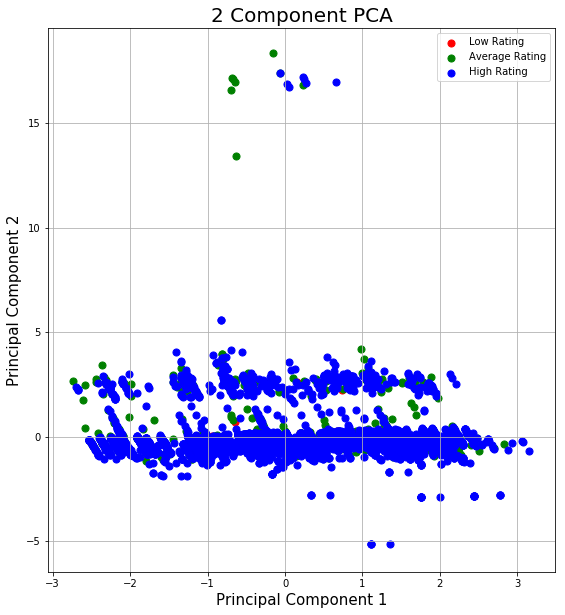

In [7]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1) 
ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('2 Component PCA', fontsize = 20)

targets = ['Low Rating', 'Average Rating', 'High Rating']
colors = 'rgb'
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Rating'] == target
    ax1.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax1.legend(targets)
ax1.grid()

In [8]:
print(pca.explained_variance_ratio_)

print(pca.explained_variance_ratio_.sum())

[0.22621837 0.15744726]
0.38366562401201965
